Introduction
=============
What is the context of the work? What research question are you trying to answer? What are your main findings?

Data Description
=============
Answer the following questions:
* What are the observations (rows) and the attributes (columns)?
* Why was this dataset created?
* Who funded the creation of the dataset?
* What processes might have influenced what data was observed and recorded and what was not?
* What preprocessing was done, and how did the data come to be in the form that you are using?
* If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
* Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 


In [61]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

In [3]:
'''
The purpose of the code in this cell is to tranform the txt files we have into workable csv files##
'''

#Open raw text files containing tables for respective movie information
open_titles_data = open("movie_titles_metadata.txt", mode = "r")
open_characters_data = open("movie_characters_metadata.txt", mode = 'r')
open_lines_data = open("movie_lines.txt", mode = 'r')
open_conversations_data = open("movie_conversations.txt", mode = 'r')


#Create a csv file for each text to work on
titles_csv = open("titles_workable.csv","w+")
characters_csv = open("characters_workable.csv", "w+")
lines_csv = open("lines_workable.csv", "w+")
conversations_csv = open("conversations_workable.csv", "w+")



###Write csv file from raw text files###

#Titles#
for line in open_titles_data:
    #replace commas in any list elements, interferes with parser
    line = line.replace(",","-")
    #replace default separater with comma to read as csv
    titles_csv.write(line.replace(" +++$+++ ",","))
titles_csv.close()


#Characters#
for line in open_characters_data:
    #replace commas in any list elements, interferes with parser
    line = line.replace(",","-")
    #replace default separater with comma to read as csv
    characters_csv.write(line.replace(" +++$+++ ",","))
characters_csv.close()


#Lines#
for line in open_lines_data:
    #replace commas in any list elements, interferes with parser
    line = line.replace(",","-")
    #replace default separater with comma to read as csv
    lines_csv.write(line.replace(" +++$+++ ",","))
lines_csv.close()


#Conversations#
for line in open_conversations_data:
    #replace commas in any list elements, interferes with parser
    line = line.replace(",","-")
    #replace default separater with comma to read as csv
    conversations_csv.write(line.replace(" +++$+++ ",","))
conversations_csv.close()

movie_titles = pd.read_csv("titles_workable.csv", encoding='latin-1', header = None)
movie_characters = pd.read_csv("characters_workable.csv", encoding='latin-1', header = None)
movie_lines = pd.read_csv("lines_workable.csv", encoding='latin-1', header = None)
movie_conversations = pd.read_csv("conversations_workable.csv", encoding='latin-1', header = None)

In [4]:
'''
The purpose of the code in this cell is to create workable dataframes from the csv files we created
'''

#Set column names for each table we have to work with##
movie_titles.columns = ['movieID', 'title', 'year', 'rating', '# of votes', 'genres']
movie_characters.columns = ['characterID', 'name', 'movieID', 'title', 'gender', 'pos in credits']
movie_lines.columns = ['lineID', 'characterID', 'movieID', 'name', 'text']
movie_conversations.columns = ['characterID_first' , 'characterID_second' , 'movieID', 'line_order']


for i in range(len(movie_titles['genres'])):
    #put the original list of genres back together, currently stored as a string representation of a list
    movie_titles['genres'][i] = movie_titles['genres'][i].strip('][').split('- ') 
    
for i in range(len(movie_conversations['line_order'])):
    #put the original list of lines that make a conversation back together, 
    #currently stored as a string representation of a list
    movie_conversations['line_order'][i] = movie_conversations['line_order'][i].strip('][').split('- ')

C:\Users\peter\AppData\Local\conda\conda\envs\info2950\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
movie_titles.head()

,movieID,title,year,rating,# of votes,genres
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
1,m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']"
2,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']"
3,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']"
4,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thrill..."


In [6]:
movie_characters.head()

,characterID,name,movieID,title,gender,pos in credits
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


In [7]:
movie_lines.head()

,lineID,characterID,movieID,name,text
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [8]:
movie_conversations.head()

,characterID_first,characterID_second,movieID,line_order
0,u0,u2,m0,"['L194', 'L195', 'L196', 'L197']"
1,u0,u2,m0,"['L198', 'L199']"
2,u0,u2,m0,"['L200', 'L201', 'L202', 'L203']"
3,u0,u2,m0,"['L204', 'L205', 'L206']"
4,u0,u2,m0,"['L207', 'L208']"


In [9]:
'''
The purpose of the code in this cell is to create a dataframe that contains 
movies that are categorized as comedies, their respective rating, and counts of the distributions of curse words in 
those movies
'''

#Create a copy of movie_titles to alter
comedy_movies = movie_titles.copy()

#Create a column that will be used to filter out movies that are NOT comedies
comedy_movies["isComedy"] = False
for i in range(len(movie_titles['genres'])):
    comedy_movies["isComedy"][i] = "'comedy'" in comedy_movies['genres'][i]
comedy_movies = comedy_movies[comedy_movies['isComedy'] == True]

#Create a new dataframe whose observations are movie lines from comedy films
comedy_movie_lines = comedy_movies.merge(movie_lines, how = 'inner', on = 'movieID')

#Create a list of the most common curse words (variations of these are attributed for as well) to check for
curse_words = ['fuck', 'fook', 'shit', 'shite', 'bitch', 'cunt', 'asshole', ' ass ' ,' arse ', 'bastard']

#Initialze what will be a nested dictionary. comedy_cursword_dist > movie >> curseword >>> curseword count in that movie 
comedy_curseword_dist = {}


#Initialize the inner dictionaries
for movie in comedy_movies['movieID']:
    comedy_curseword_dist[movie] = {}

#Initialize each curseword count to 0
for key in comedy_curseword_dist:
    for curse in curse_words:
        comedy_curseword_dist[key][curse] = 0
        
#For each curseword, every line of every movie is checked. If a line contains the word, count the number of instances and
#store the figure in the dictionary corresponding to the appropriate movie and word
for curse in curse_words:
    for line in range(len(comedy_movie_lines['text'])):
        comedy_curseword_dist[ comedy_movie_lines['movieID'][line] ][curse] += str(comedy_movie_lines['text'][line]).count(curse)


#Create new dataframe that will contain information from movie_titles, but only for comedies, as well as the distribution 
#of cursewords for each movie
comedies_ratings_curses = pd.DataFrame()
comedies_ratings_curses['movieID'] = comedy_curseword_dist

for curse in curse_words:
    comedies_ratings_curses[curse] = 0
    
for line in range(len(comedies_ratings_curses)):
    for curse in curse_words:
        comedies_ratings_curses[curse][line] = comedy_curseword_dist [ comedies_ratings_curses['movieID'][line] ][curse]
        
comedies_ratings_curses['total curses'] = comedies_ratings_curses.sum(axis=1)

comedies = movie_titles.merge(comedies_ratings_curses, how = 'inner', on = 'movieID')
comdies = comedies[['movieID', 'title', 'rating', '# of votes', 'fuck', 'fook', 'shit', 'shite', 
                    'bitch', 'cunt', 'asshole', ' ass ', ' arse ', 'bastard', 'total curses']]

C:\Users\peter\AppData\Local\conda\conda\envs\info2950\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\peter\AppData\Local\conda\conda\envs\info2950\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [127]:
comedies.head()

,movieID,title,year,rating,# of votes,genres,fuck,fook,shit,shite,bitch,cunt,asshole,ass,arse,bastard,total curses
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",3,0,6,0,2,0,1,0,0,0,12
1,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thrill...",9,0,34,0,4,0,6,6,0,1,60
2,m12,airplane ii: the sequel,1982,5.8,15210,"['comedy', 'romance', 'sci-fi']",0,0,1,0,0,0,0,0,0,0,1
3,m13,airplane!,1980,7.8,57692,"['comedy', 'romance']",0,0,1,0,0,0,1,0,0,0,2
4,m22,austin powers: international man of mystery,1997,7.1,75240,"['action', 'adventure', 'comedy', 'crime']",0,0,1,0,0,0,0,1,0,1,3


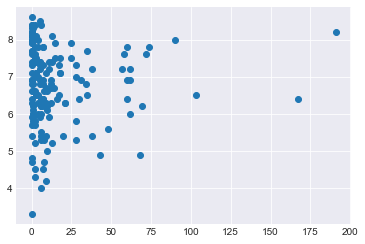

In [129]:
plt.scatter(comedies['total curses'],comedies['rating'])

In [11]:
'''
The purpose of this cell is to construct a dataframe that contains for each year, a count 
of the number of lines in a comedy script by a male actor vs. a female actor
'''

#Retrieves relevant info from the lines of comedy movies dataframe
comedy_movie_lines_trim = comedy_movie_lines[['movieID', 'title', 'year', 'lineID', 'characterID', 'name', 'text']]

#Adds in info  about the characters saying those lines
comedy_lines_characterinfo = comedy_movie_lines_trim.merge(movie_characters)

#Compiles a list of years in the dataset
years_recorded = []
for year in comedy_lines_characterinfo['year']:
    if year not in years_recorded:
        years_recorded.append(year)

#Changes list of years to ints and sorts
for i in range(len(years_recorded)):
    years_recorded[i] = int(years_recorded[i][:4])
years_recorded.sort()

#Initializes what will be a nested dictionary. For each year, a count of lines for comedy movies in that year
years_recorded_mflines = {}

#Creates inner dictionary.
for year in years_recorded:
    years_recorded_mflines[str(year)] = {'m': 0, 'f': 0}
    

#For each line in each comedy movie, adds 1 to the count of the respective movie/gender combo
for i in range(len(comedy_lines_characterinfo)):
    if comedy_lines_characterinfo['year'][i] not in years_recorded_mflines:
        pass
    elif comedy_lines_characterinfo['gender'][i] == 'm':
        years_recorded_mflines[ comedy_lines_characterinfo['year'][i] ]['m'] += 1
    elif comedy_lines_characterinfo['gender'][i] == 'f':
        years_recorded_mflines[ comedy_lines_characterinfo['year'][i] ]['f'] += 1

#Creates new dataframe that will be years and number of lines for males and females in that year in comedy movies
comedy_line_breakdown = pd.DataFrame()
comedy_line_breakdown['Year'] = years_recorded_mflines
comedy_line_breakdown['Male Lines'] = 0
comedy_line_breakdown['Female Lines'] = 0

for i in range(len(comedy_line_breakdown)):
    comedy_line_breakdown['Male Lines'][i] = years_recorded_mflines[ comedy_line_breakdown['Year'][i] ]['m']
    comedy_line_breakdown['Female Lines'][i] = years_recorded_mflines[ comedy_line_breakdown['Year'][i] ]['f']

C:\Users\peter\AppData\Local\conda\conda\envs\info2950\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\peter\AppData\Local\conda\conda\envs\info2950\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [292]:
comedy_line_breakdown.head()
comedy_line_breakdown.to_csv(r'C:\Users\peter\Desktop\2950-Project\Comedy_Lines_Year_vs_Gender.csv', index = False, header=True)

In [186]:
type(comedy_line_breakdown['Year'][0])

int

Data Analysis
=============
* Use summary functions like mean and standard deviation along with visual displays like scatter plots and histograms to describe data.
* Provide at least one model showing patterns or relationships between variables that addresses your research question. This could be a regression or clustering, or something else that measures some property of the dataset.


Tried male and female vs. time, nada. Bad graph, bad $r^2$

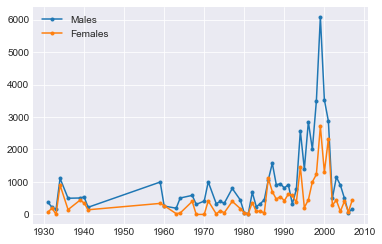

In [151]:
plt.style.use('seaborn-darkgrid')



plt.plot(comedy_line_breakdown['Year'],comedy_line_breakdown['Male Lines'], marker = '.', label = 'Males')
plt.plot(comedy_line_breakdown['Year'],comedy_line_breakdown['Female Lines'], marker = '.', label = 'Females')
plt.legend()
plt.show()

In [192]:
lines_model_m = LinearRegression().fit(comedy_line_breakdown[['Year']],comedy_line_breakdown['Male Lines'])
lines_model_f = LinearRegression().fit(comedy_line_breakdown[['Year']],comedy_line_breakdown['Female Lines'])


lines_model_f.score(comedy_line_breakdown[['Year']],comedy_line_breakdown['Female Lines'])
lines_model_m.score(comedy_line_breakdown[['Year']],comedy_line_breakdown['Male Lines'])

0.14882804945495232

However, graph shows maybe there is a relationship between female lines and male lines

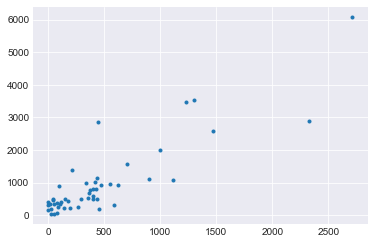

In [165]:
plt.style.use('seaborn-darkgrid')
plt.scatter(comedy_line_breakdown['Female Lines'],comedy_line_breakdown['Male Lines'], marker = '.')
plt.show()

In [273]:
male_mean = comedy_line_breakdown['Male Lines'].mean()
male_std = comedy_line_breakdown['Male Lines'].std()

female_mean = comedy_line_breakdown['Female Lines'].mean()
female_std = comedy_line_breakdown['Female Lines'].std()

print ('Male mean = ', male_mean)
print ('Female mean =', female_mean)
print('\n')
print('Male std = ', male_std)
print('Female std = ', female_std)

np.corrcoef(comedy_line_breakdown['Female Lines'],comedy_line_breakdown['Male Lines'])
#np.cov(comedy_line_breakdown['Female Lines'],comedy_line_breakdown['Male Lines'])

Male mean =  966.8163265306123
Female mean = 458.85714285714283


Male std =  1140.170120228216
Female std =  561.4687213015521


array([[1.        , 0.87323454],
       [0.87323454, 1.        ]])

In [204]:
f_vs_m = LinearRegression().fit(comedy_line_breakdown[['Female Lines']],comedy_line_breakdown['Male Lines'])
f_vs_m.score(comedy_line_breakdown[['Female Lines']],comedy_line_breakdown['Male Lines'])

0.7625385585501347

In [209]:
f_vs_m.coef_[0]
f_vs_m.intercept_

153.1384847281795

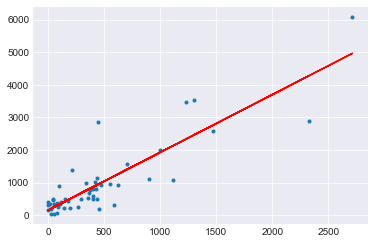

In [223]:
plt.style.use('seaborn-darkgrid')


predict = f_vs_m.predict(comedy_line_breakdown[['Female Lines']])


plt.scatter(comedy_line_breakdown['Female Lines'],comedy_line_breakdown['Male Lines'], marker = '.')
plt.plot(comedy_line_breakdown[['Female Lines']], predict, color = 'r')
plt.show()

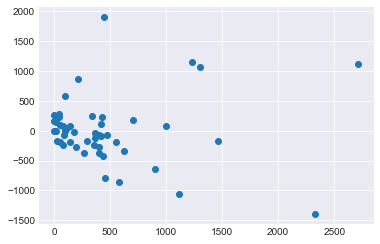

In [239]:
residuals = comedy_line_breakdown['Male Lines'] - predict
plt.scatter(comedy_line_breakdown['Female Lines'],residuals)
plt.show()

In [244]:
np.sqrt(sum((residuals**2))/(len(comedy_line_breakdown['Male Lines'])-2))

561.4846593034966

In [247]:
lenth_dat = len(comedy_line_breakdown['Male Lines'])-2

Evaluation of Significance
=============
* Use hypothesis tests, simulation, randomization, or any other techniques we have learned to compare the patterns you observe in the dataset to simple randomness. 


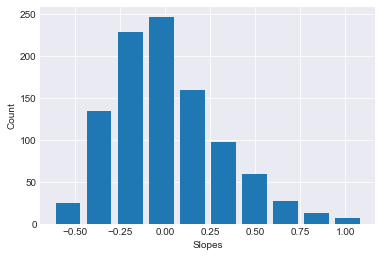

In [280]:
def permuted_y():
    return np.random.permutation(comedy_line_breakdown['Male Lines'].copy())

permuted_stuff = np.zeros(1000)
for i in range(0,1000):
    model = LinearRegression().fit(comedy_line_breakdown[['Female Lines']],permuted_y())
    model_co = model.coef_
    permuted_stuff[i] = float(model_co)
    
plt.hist(permuted_stuff, rwidth = .8)
plt.xlabel("Slopes")
plt.ylabel("Count")
plt.show()

In [287]:
num = np.sqrt(sum((residuals**2))/(len(comedy_line_breakdown['Male Lines'])-2))
denom = np.sqrt(sum((comedy_line_breakdown['Female Lines']-female_mean)**2))
se = num/denom
f_vs_m.coef_[0]/se

array([1.77327051])

Conclusion
=============
* What did you find over the course of your data analysis, and how confident are you in these conclusions? Interpret these results in the wider context of the real-life application from where your data hails.
